## 1. Train Language Embeddings

In this section, we will train language embeddings for a language other than English. The goal is to train embeddings on a language corpus and understand how they can be used for downstream tasks like chatbot development.

### Steps:
- **Load Data**: Load a corpus of text in your native language.
- **Train Word2Vec Embeddings**: Use the gensim Word2Vec model to train embeddings on the corpus.
- **Save the Model**: Save the embeddings in a file format that can be reused for evaluation and other tasks.


In [44]:
!pip install gensim
# !pip install indic-nlp-library

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 5.7 MB/s eta 0:00:00a 0:00:01


In [2]:
!pip install -q kagglehub

In [3]:
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
import re
import string
from indicnlp.tokenize import sentence_tokenize, indic_tokenize  # Part of Indic NLP Library


In [4]:
import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("sourabh219/oscarmarathicorpus")

# print("Path to dataset files:", path)

In [5]:
kagglehub.dataset_download

<function kagglehub.datasets.dataset_download(handle: str, path: Optional[str] = None, *, force_download: Optional[bool] = False) -> str>

In [6]:
!pip install -q aiobotocore

In [7]:
# from datasets import load_dataset
# import re
# import string

# def load_and_clean_text_from_dataset(file_path):
#     # Load the dataset
#     dataset = load_dataset('oscar', 'unshuffled_deduplicated_mr', data_files=file_path, split='train')

#     # Extract text and clean it
#     marathi_text = []
#     for record in dataset:
#         text = record['text']
#         # Remove punctuation and numbers
#         text = re.sub(r'[{}]'.format(string.punctuation), ' ', text)
#         text = re.sub(r'\d+', '', text)
#         marathi_text.append(text)
    
#     return marathi_text

# # Load and clean text
# file_path = f'{path}/dataset.arrow'
# marathi_text = load_and_clean_text_from_dataset(file_path)

# # You can then save or further process `marathi_text`
# print(marathi_text[:5])  # Display the first 5 cleaned texts for verification


In [8]:
def load_and_clean_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
    # Remove punctuation and numbers
    text = re.sub(r'[{}]'.format(string.punctuation), ' ', text)
    text = re.sub(r'\d+', '', text)
    return text
file_path = "/Users/sudarshan/courses/Neural_Modeling_Methods_&_Tool/W9L1/mar-in_web_2015_300K/mar-in_web_2015_300K-sentences.txt"

marathi_text = load_and_clean_text(file_path)


In [9]:
for i in range(0,10):
    print(marathi_text[i:i+1000])

	 द्वारा पोस्ट केलेले सतीश लळीत  महाराष्ट्र शासनात वरिष्ठ अधिकारी 
	     द्वारा पोस्ट केलेले सतीश लळीत  महाराष्ट्र शासनात वरिष्ठ अधिकारी 
	 द्वारा पोस्ट केलेले सतीश लळीत  महाराष्ट्र शासनात वरिष्ठ अधिकारी 
	 टक्के इतके अल्प असते 
	    द्वारा पोस्ट केलेले सतीश लळीत  महाराष्ट्र शासनात वरिष्ठ अधिकारी 
	  किंवा त्याहूनही कमी करण्यात येते 
	  असल्याचे अनुमान काढण्यात आले आहे 
	  पर्यत अथवा कुंटूंब दारिद्रय रेषेखालील असल्यास प्राधान्य   महिलांना विविध साहित्य पुरविणे 
	   पर्यत अथवा कुंटूंब दारिद्रय रेषेखालील असल्यास प्राधान्य   महिलांना विविध साहित्य पुरविणे 
	  पर्यत अथवा कुंटूंब दारिद्रय रेषेखालील असल्यास प्राधान्य क  वार्षिक उत्पन्नाचा दाखला तलाठी तहसिलदार यांचा आवश्यक ड  लाभार्थी चे वय  वर्षे पेक्षा कमी व त्यांचेकडे सक्षम संस्थेचे शिवणकाम प्रशिक्षण घेतलेचे प्रमाणपत्र आवश्यक 
	   प्रत्येक आयएसडीएन पीआरआय साठी मासिक कनेक्टिव्हिटी फ़्रैंचाइजीना पूल बिलींगची सुविधा दिली जाते व जेवढया पीआरआय लाईनसाठी जेवढे लाख कॉल पूर्ण केले असतील तेवढी कनेक्टिव्हिटी मूल्यात सूट दिली जाईल 
	 वर्षापासून आहे 
	

In [10]:
# Split text into sentences
sentences = sentence_tokenize.sentence_split(marathi_text, lang='mr')

# Tokenize each sentence into words
tokenized_sentences = [indic_tokenize.trivial_tokenize(sentence) for sentence in sentences]


In [11]:
tokenized_sentences[0]

['द्वारा',
 'पोस्ट',
 'केलेले',
 'सतीश',
 'लळीत',
 'महाराष्ट्र',
 'शासनात',
 'वरिष्ठ',
 'अधिकारी',
 '\n',
 'द्वारा',
 'पोस्ट',
 'केलेले',
 'सतीश',
 'लळीत',
 'महाराष्ट्र',
 'शासनात',
 'वरिष्ठ',
 'अधिकारी',
 '\n',
 'द्वारा',
 'पोस्ट',
 'केलेले',
 'सतीश',
 'लळीत',
 'महाराष्ट्र',
 'शासनात',
 'वरिष्ठ',
 'अधिकारी',
 '\n',
 'टक्के',
 'इतके',
 'अल्प',
 'असते',
 '\n',
 'द्वारा',
 'पोस्ट',
 'केलेले',
 'सतीश',
 'लळीत',
 'महाराष्ट्र',
 'शासनात',
 'वरिष्ठ',
 'अधिकारी',
 '\n',
 'किंवा',
 'त्याहूनही',
 'कमी',
 'करण्यात',
 'येते',
 '\n',
 'असल्याचे',
 'अनुमान',
 'काढण्यात',
 'आले',
 'आहे',
 '\n',
 'पर्यत',
 'अथवा',
 'कुंटूंब',
 'दारिद्रय',
 'रेषेखालील',
 'असल्यास',
 'प्राधान्य',
 'महिलांना',
 'विविध',
 'साहित्य',
 'पुरविणे',
 '\n',
 'पर्यत',
 'अथवा',
 'कुंटूंब',
 'दारिद्रय',
 'रेषेखालील',
 'असल्यास',
 'प्राधान्य',
 'महिलांना',
 'विविध',
 'साहित्य',
 'पुरविणे',
 '\n',
 'पर्यत',
 'अथवा',
 'कुंटूंब',
 'दारिद्रय',
 'रेषेखालील',
 'असल्यास',
 'प्राधान्य',
 'क',
 'वार्षिक',
 'उत्पन्नाचा',
 'दाखला',
 'तलाठी',

In [12]:
model = Word2Vec(
    sentences=tokenized_sentences,
    vector_size=100,   # Dimensionality of the word vectors
    window=5,          # Context window size
    min_count=2,       # Ignores words with total frequency lower than this
    workers=4,         # Number of CPU threads
    sg=1               # 1 for skip-gram; 0 for CBOW
)

In [13]:
model.save("marathi_word2vec.model")

[('माध्यमाच्या', 0.78094083070755), ('माध्यमिक', 0.7644445896148682), ('शाळांमध्ये', 0.7604185938835144), ('शाळेत', 0.7596253752708435), ('शाळांना', 0.7335298657417297), ('दवाखाना', 0.7293843030929565), ('खाजगी', 0.726482093334198), ('मुलींसाठी', 0.721418023109436), ('महाविद्यालये', 0.7198560833930969), ('शाळांत', 0.7174965739250183)]


/Users/sudarshan/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2310 (\N{DEVANAGARI LETTER AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sudarshan/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sudarshan/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2361 (\N{DEVANAGARI LETTER HA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sudarshan/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2375 (\N{DEVANAGARI VOWEL SIGN E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sudarshan/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2339 (\N{DEVANAGARI LETTER NNA}) missing from current font.
  fi

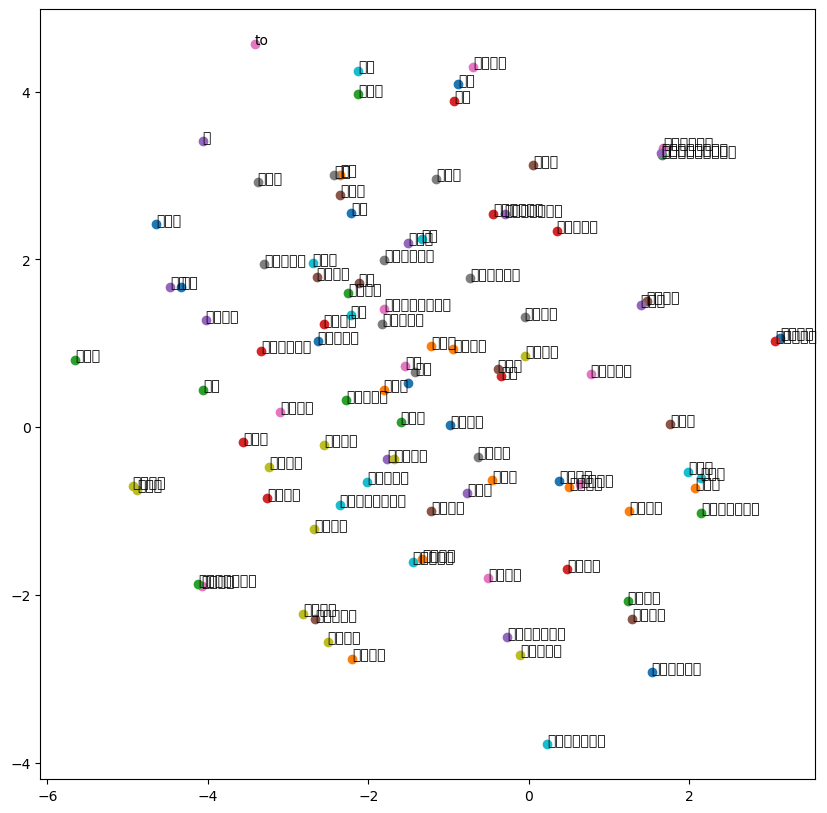

In [14]:
# Find similar words
print(model.wv.most_similar("शाळा"))  # Replace "शाळा" with any Marathi word in your corpus

# Visualize embeddings using t-SNE
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Select a subset of words
words = list(model.wv.index_to_key)[:100]
word_vectors = model.wv[words]

# Reduce dimensionality
tsne = TSNE(n_components=2, random_state=0)
word_vectors_2d = tsne.fit_transform(word_vectors)

# Plot
plt.figure(figsize=(10, 10))
for i, word in enumerate(words):
    plt.scatter(word_vectors_2d[i, 0], word_vectors_2d[i, 1])
    plt.annotate(word, (word_vectors_2d[i, 0], word_vectors_2d[i, 1]))
plt.show()


## 2. Develop RNN-based Embeddings

Next, we'll implement an RNN-based approach to learn word embeddings. This will involve defining an RNN model that learns embeddings via backpropagation and comparing the results with the Word2Vec approach.

### Steps:
- **RNN Model**: Define an RNN to learn embeddings.
- **Train the Model**: Use the same corpus for training the RNN.
- **Extract Embeddings**: Extract the learned embeddings from the RNN and analyze their quality.


In [1]:
# !pip uninstall tensorflow

In [23]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM, Bidirectional, Lambda
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K
import re

In [24]:
# Set random seed for reproducibility
np.random.seed(13)
tf.random.set_seed(13)

# Define a function to preprocess and extract sentences from a file
def extract_sentences_from_file(file_path):
    sentences = []
    
    # Open and read the file
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    
    # Process each line
    for line in lines:
        # Remove leading numbers and spaces
        line = re.sub(r'^\d+\s+', '', line)
        # Remove numbers and symbols
        sentence = re.sub(r'[०१२३४५६७८९0-9%]+', '', line)
        # Add cleaned sentence to list if not empty
        cleaned_sentence = sentence.strip()
        if cleaned_sentence:
            sentences.append(cleaned_sentence)
    
    return sentences

# Usage example:
file_path = "/Users/sudarshan/courses/Neural_Modeling_Methods_&_Tool/W9L1/mar-in_web_2015_300K/mar-in_web_2015_300K-sentences.txt"
# file_path = 'path_to_your_file.txt'
marathi_sentences = extract_sentences_from_file(file_path)

In [33]:
print(len(marathi_sentences))


300000


In [64]:
import random

# Select 10,000 random sentences
random_sentences = random.sample(marathi_sentences, 100)
print(len(random_sentences))

100


In [35]:
# Initialize the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(random_sentences)
corpus = tokenizer.texts_to_sequences(random_sentences)
vocab_size = len(tokenizer.word_index) + 1

# Function to generate training data
def generate_data(corpus, window_size, V):
    maxlen = window_size * 2
    for words in corpus:
        L = len(words)
        for index, word in enumerate(words):
            contexts = []
            labels = []
            s = index - window_size
            e = index + window_size + 1

            contexts.append([words[i] for i in range(s, e) if 0 <= i < L and i != index])
            labels.append(word)

            x = pad_sequences(contexts, maxlen=maxlen, padding='post')
#             y = to_categorical(labels, V)
            y = tf.keras.utils.to_categorical(labels, V)
            yield (x, y)

# Parameters for the embedding
dim = 100
window_size = 2
V = vocab_size

# Define the RNN-based embedding model (CBOW-style with mean aggregation)
cbow = Sequential()
cbow.add(Embedding(input_dim=V, output_dim=dim,input_shape=(window_size * 2,)))
cbow.add(Lambda(lambda x: K.mean(x, axis=1), output_shape=(dim,)))
cbow.add(Dense(V, activation='softmax'))

cbow.summary()

# Compile the model
cbow.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/Users/sudarshan/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 4, 100)         │        90,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda_2 (Lambda)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 901)            │        91,001 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 181,101 (707.43 KB)

 Trainable params: 181,101 (707.43 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
# Training the model
epochs = 2
for epoch in range(epochs):
    total_loss = 0.0  # Use a separate variable for total loss
    for x, y in generate_data(corpus, window_size, V):
        batch_loss, _ = cbow.train_on_batch(x, y)  # Unpack the loss and accuracy
        total_loss += batch_loss
        print(total_loss)

    print(f'Epoch {epoch+1}/{epochs}, Loss: {total_loss:.4f}')


6.77661657333374
13.553037643432617
20.32926368713379
27.1052508354187
33.88090419769287
40.65572690963745
47.43035364151001
54.204795360565186
60.97905731201172
67.75274229049683
74.52625465393066
81.29957675933838
88.07251596450806
94.84495162963867
101.61718559265137
108.38922691345215
115.16069269180298
121.93119812011719
128.70154190063477
135.4717035293579
142.24166345596313
149.01142072677612
155.7809977531433
162.5503830909729
169.31909370422363
176.08617496490479
182.85299921035767
189.61889839172363
196.38443517684937
203.14979314804077
209.91485738754272
216.6797389984131
223.44442415237427
230.2088646888733
236.97296285629272
243.73634672164917
250.49940156936646
257.26228046417236
264.0249843597412
270.78716230392456
277.54902696609497
284.31053829193115
291.0717911720276
297.8328785896301
304.5937695503235
311.35447549819946
318.1147360801697
324.8748068809509
331.634681224823
338.39410638809204
345.15335416793823
351.9124011993408
358.67106008529663
365.4291000366211
372

2987.8882489204407
2994.5552320480347
3001.222210407257
3007.8887042999268
3014.555127620697
3021.2212147712708
3027.887255191803
3034.553099155426
3041.2188873291016
3047.8845958709717
3054.5502219200134
3061.2157850265503
3067.8812527656555
3074.546633720398
3081.2119274139404
3087.8771238327026
3094.542236328125
3101.207275390625
3107.872220993042
3114.5371828079224
3121.2021021842957
3127.8669991493225
3134.531819820404
3141.196539878845
3147.8611931800842
3154.525763988495
3161.1902656555176
3167.8546957969666
3174.519070148468
3181.1833806037903
3187.847553253174
3194.5101017951965
3201.172686100006
3207.8348054885864
3214.4968643188477
3221.158899307251
3227.8197717666626
3234.4806842803955
3241.1414279937744
3247.8021850585938
3254.4626183509827
3261.1230120658875
3267.783067703247
3274.4412908554077
3281.0994625091553
3287.7576265335083
3294.4157209396362
3301.0737957954407
3307.7318387031555
3314.3898587226868
3321.0474395751953
3327.7045192718506
3334.361636161804
3341.01875

5991.022585391998
5997.653008937836
6004.28351688385
6010.914085388184
6017.544734954834
6024.174852848053
6030.8048939704895
6037.435022354126
6044.0653557777405
6050.69554567337
6057.325837612152
6063.956182479858
6070.586591720581
6077.217051029205
6083.847570896149
6090.478154659271
6097.108506679535
6103.738454818726
6110.367980957031
6116.997611999512
6123.627311706543
6130.257044792175
6136.886847496033
6143.516707897186
6150.146674156189
6156.776006221771
6163.405471324921
6170.03503704071
6176.664663314819
6183.294397830963
6189.923094749451
6196.551862716675
6203.180698871613
6209.809567928314
6216.438471317291
6223.067437648773
6229.6964955329895
6236.3251366615295
6242.953901767731
6249.582754135132
6256.211694717407
6262.840646743774
6269.469641685486
6276.098705768585
6282.727883338928
6289.356083869934
6295.984237670898
6302.612251281738
6309.240010738373
6315.867201328278
6322.494318008423
6329.121527671814
6335.748794555664
6342.376103401184
6349.00346660614
6355.63089

1265.1763634681702
1271.7407450675964
1278.3049850463867
1284.8690509796143
1291.4329271316528
1297.9966526031494
1304.5602231025696
1311.1236362457275
1317.6863932609558
1324.248939037323
1330.8108620643616
1337.3725147247314
1343.9338760375977
1350.4947123527527
1357.055413722992
1363.615894317627
1370.1760439872742
1376.7357740402222
1383.2952499389648
1389.854459285736
1396.4134969711304
1402.972415447235
1409.5312280654907
1416.0898733139038
1422.6483511924744
1429.2066378593445
1435.7647461891174
1442.3227181434631
1448.8805661201477
1455.4382643699646
1461.9958205223083
1468.5532507896423
1475.1104578971863
1481.6675267219543
1488.2244362831116
1494.7811884880066
1501.3377528190613
1507.894157409668
1514.4503860473633
1521.0064606666565
1527.5619525909424
1534.1172494888306
1540.6724028587341
1547.2274012565613
1553.782232761383
1560.33691072464
1566.891444683075
1573.445852279663
1579.9998207092285
1586.5534162521362
1593.1068015098572
1599.6600441932678
1606.213138103485
1612.

4154.168933391571
4160.656536579132
4167.144071102142
4173.631527900696
4180.118899345398
4186.606210708618
4193.093500614166
4199.580760002136
4206.067969799042
4212.555189609528
4219.042271137238
4225.5293707847595
4232.015255451202
4238.501132965088
4244.986975669861
4251.4726729393005
4257.958301067352
4264.443892002106
4270.9294629096985
4277.414874076843
4283.900099277496
4290.385261058807
4296.870377540588
4303.355433940887
4309.840389251709
4316.325284481049
4322.810113430023
4329.294913768768
4335.779440402985
4342.263898849487
4348.748314857483
4355.232665538788
4361.7169399261475
4368.2011461257935
4374.685285568237
4381.1693234443665
4387.653298854828
4394.137250423431
4400.62118768692
4407.105085849762
4413.588987827301
4420.072134971619
4426.555255413055
4433.038322925568
4439.521332740784
4446.004281997681
4452.487189292908
4458.969763278961
4465.452324390411
4471.934863090515
4478.417249679565
4484.89950466156
4491.381618022919
4497.863470554352
4504.344967842102
4510.8

7101.4861125946045
7107.926664352417
7114.367245197296
7120.807422161102
7127.247602939606
7133.6878571510315
7140.128027915955
7146.5681848526
7153.008355140686
7159.448557376862
7165.888787746429
7172.3290276527405
7178.769001483917
7185.209008693695
7191.649039745331
7198.089063644409
7204.528699398041
7210.967777252197
7217.406692504883
7223.845414161682
7230.284077644348
7236.722641944885
7243.161169052124
7249.599650859833
7256.038081169128
7262.476498126984
7268.914918899536
7275.353361606598
7281.791636943817
7288.22958278656
7294.667542934418
7301.105387687683
7307.543246269226
7313.9811091423035
7320.418772220612
7326.856331825256
7333.29390668869
7339.731375694275
7346.1689438819885
7352.606328487396
7359.043318271637
7365.480378627777
7371.917484760284
7378.354594707489
7384.791754245758
7391.228552341461
7397.664862155914
7404.101263523102
7410.537724018097
7416.9741768836975
7423.410610198975
7429.846973419189
7436.283352851868
7442.719770908356
7449.156114578247
7455.592

In [40]:
batch_loss

array(6.4334283, dtype=float32)

In [41]:
# Training the model
epochs = 50
for epoch in range(epochs):
    total_loss = 0.0  # Use a separate variable for total loss
    for x, y in generate_data(corpus, window_size, V):
        batch_loss, _ = cbow.train_on_batch(x, y)  # Unpack the loss and accuracy
        total_loss += batch_loss
    print(batch_loss, total_loss)

    print(f'Epoch {epoch+1}/{epochs}, Loss: {total_loss:.4f}')


6.218804 7296.3119468688965
Epoch 1/50, Loss: 7296.3119
5.9714236 7033.182321548462
Epoch 2/50, Loss: 7033.1823
5.6952558 6733.02365064621
Epoch 3/50, Loss: 6733.0237


KeyboardInterrupt: 

4. Compare Embedding Quality
In this step, we will compare the quality of embeddings produced by the different models (Word2Vec, RNN) and any pre-trained embeddings.

Steps:
Use Cosine Similarity: Compare word similarity between embeddings using cosine similarity.
t-SNE for Visualization: Use t-SNE to visualize the embeddings in 2D space.
Metrics: Use metrics like chatbot performance, word similarity, or visual analysis to compare embeddings.

In [52]:
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import KeyedVectors

# Load the Word2Vec embeddings using KeyedVectors
try:
    word2vec_model = KeyedVectors.load_word2vec_format("my_cbow_vectors.txt", binary=False)
    print("Embeddings loaded successfully.")
except EOFError as e:
    print("Error loading embeddings: EOFError", e)
except Exception as e:
    print("An error occurred:", e)

# Load RNN embeddings
rnn_embeddings = cbow.get_weights()[0]  # Extract embeddings from the trained RNN model
rnn_vocab = tokenizer.word_index         # Word index from the tokenizer

# Function to compare embeddings
def embedding_similarity(word, word2vec_model, rnn_embeddings, rnn_vocab):
    if word in word2vec_model and word in rnn_vocab:
        # Get Word2Vec embedding directly from KeyedVectors
        emb1 = word2vec_model[word].reshape(1, -1)
        
        # Get RNN embedding (using the index from the tokenizer's word index)
        rnn_index = rnn_vocab[word]
        emb2 = rnn_embeddings[rnn_index].reshape(1, -1)

        # Calculate cosine similarity
        similarity = cosine_similarity(emb1, emb2)[0][0]
        print(f"Similarity for '{word}' between models: {similarity}")
    else:
        print(f"'{word}' not in vocabulary for one or both models.")

# Test comparison for a word
embedding_similarity("प्रश्न", word2vec_model, rnn_embeddings, rnn_vocab)


Embeddings loaded successfully.
Similarity for 'प्रश्न' between models: 1.0


In [38]:
# import tensorflow as tf

# # Assuming `generate_data` yields batches of (x, y)
# def data_generator():
#     for x, y in generate_data(corpus, window_size, V):
#         yield x, y

# # Create a tf.data.Dataset from the generator
# batch_size = 32  # Adjust batch size as needed
# dataset = tf.data.Dataset.from_generator(data_generator, output_signature=(
#     tf.TensorSpec(shape=(None,), dtype=tf.int32),  # Adjust shape and dtype as per your data
#     tf.TensorSpec(shape=(None,), dtype=tf.int32)
# )).batch(batch_size)

# # Compile the model (if not already compiled)
# cbow.compile(optimizer='adam', loss='categorical_crossentropy')

# # Train the model for multiple epochs using `fit`
# epochs = 10
# cbow.fit(dataset, epochs=epochs)


In [42]:
# # # Training the model
# # epochs = 20
# # for epoch in range(epochs):
# #     loss = 0.0
# #     for x, y in generate_data(corpus, window_size, V):
# #         loss += cbow.train_on_batch(x, y)
# #     print(f'Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}')

# # Save the embeddings to a file
# with open('my_cbow_vectors.txt', 'w') as f:
#     f.write(f'{V-1} {dim}\n')
#     vectors = cbow.get_weights()[0]
#     for word, i in tokenizer.word_index.items():
#         str_vec = ' '.join(map(str, vectors[i]))
#         f.write(f'{word} {str_vec}\n')

# print("Embeddings have been saved to 'my_cbow_vectors.txt'.")


Embeddings have been saved to 'my_cbow_vectors.txt'.


In [47]:
# from gensim.models import KeyedVectors

# # Save the embeddings to a file in KeyedVectors format
# with open('my_cbow_vectors.txt', 'w') as f:
#     f.write(f"{V} {dim}\n")  # Header with vocab size and dimensions
#     vectors = cbow.get_weights()[0]
    
#     # Write each word and its vector to the file
#     for word, i in tokenizer.word_index.items():
#         str_vec = ' '.join(map(str, vectors[i]))
#         f.write(f"{word} {str_vec}\n")

# print("Embeddings have been saved to 'my_cbow_vectors.txt' in KeyedVectors format.")


Embeddings have been saved to 'my_cbow_vectors.txt' in KeyedVectors format.


In [49]:
from gensim.models import KeyedVectors

# Get the actual vocabulary size
vocab_size = len(tokenizer.word_index)

# Save the embeddings to a file in KeyedVectors format
with open('my_cbow_vectors.txt', 'w') as f:
    # Write the header with the correct vocab size and embedding dimensions
    f.write(f"{vocab_size} {dim}\n")
    vectors = cbow.get_weights()[0]
    
    # Write each word and its corresponding vector to the file
    for word, i in tokenizer.word_index.items():
        if i < len(vectors):  # Ensure we have an embedding for this index
            str_vec = ' '.join(map(str, vectors[i]))
            f.write(f"{word} {str_vec}\n")

print("Embeddings have been saved to 'my_cbow_vectors.txt' in KeyedVectors format.")


Embeddings have been saved to 'my_cbow_vectors.txt' in KeyedVectors format.


In [73]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow.keras.backend as K
from tensorflow.keras.preprocessing.text import Tokenizer

random_sentences
# Initialize the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(random_sentences)
corpus = tokenizer.texts_to_sequences(random_sentences)
vocab_size = len(tokenizer.word_index) + 1

# Function to generate training data
def generate_data(corpus, window_size, V):
    maxlen = window_size * 2
    for words in corpus:
        L = len(words)
        for index, word in enumerate(words):
            contexts = []
            labels = []
            s = index - window_size
            e = index + window_size + 1
            context = [words[i] for i in range(s, e) if 0 <= i < L and i != index]
            
            contexts.append(context)
            labels.append(word)
            
            x = pad_sequences(contexts, maxlen=maxlen, padding='post')
            y = tf.keras.utils.to_categorical(labels, V)
            yield (x, y)

# Parameters for the embedding
dim = 100
window_size = 2
V = vocab_size

# Define the DNN-based embedding model (Shallow Model)
dnn_model = Sequential()
dnn_model.add(Embedding(input_dim=V, output_dim=dim, input_length=window_size * 2))
dnn_model.add(Flatten())  # Flatten the context embeddings
dnn_model.add(Dense(128, activation='relu'))  # Fully connected layer
dnn_model.add(Dense(V, activation='softmax'))  # Output layer

dnn_model.summary()

# Compile the model
dnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the DNN model
epochs = 100
batch_size = 32

# Train the DNN model using the data generator
dnn_model.fit(generate_data(corpus, window_size, V), steps_per_epoch=len(corpus), epochs=epochs, batch_size=batch_size)


/Users/sudarshan/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 4.5428
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step - accuracy: 0.0000e+00 - loss: 4.5194
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 4.5602
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step - accuracy: 0.0000e+00 - loss: 4.5637
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - accuracy: 0.0000e+00 - loss: 4.5521
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - accuracy: 0.0000e+00 - loss: 4.5324
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step - accuracy: 0.0000e+00 - loss: 4.5789
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - accuracy: 0.0000e+00 - loss: 4.5780
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - accuracy: 0.0000e+00 - loss: 4.5922
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 4.6098  
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - accuracy: 0.0000e+00 - loss: 0.0000e+

/Users/sudarshan/anaconda3/lib/python3.11/contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 31/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 32/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 33/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 34/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 35/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 36/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 37/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 38/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 39/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 40/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step

Epoch 94/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 95/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 96/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 97/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 98/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 99/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 100/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


2024-11-06 13:59:04.504038: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


In [76]:
dnn_embeddings = dnn_model.get_layer('embedding_8').get_weights()[0]

In [77]:
rnn_embeddings = cbow.get_weights()[0]  # Extract embeddings from the trained RNN model

In [78]:
random_sentences

['त्यात भारतीय होते तसेच चिनी वा जपानीसुद्धा खूप होते.',
 'दिल्ली मेट्रो रेल्वे कॉर्पोरेशनने (डीएमआरसी) केलेल्या अहवालातील प्राथमिक अंदाजानुसार मेट्रोच्या कामासाठी  मिळकतींचे भूसंपादन करावे लागणार आहे.',
 'त्\u200dया सभेत पंडित भारवी याला विजयी घोषित करण्\u200dयात आले.',
 'त्यामुळे पर्यायी सरकार स्थापन होऊ शकते.',
 'परंतु त्याआधी शरीरचना आणि मनोरचना ह्यांचा अपंगतेच्या संदर्भात परस्परांशी काय संबंध आहे हे पाहणे आवश्यक आहे.',
 'ओरिसा) यांनी चाकण पोलिसांत दिलेल्या फिर्यादी दिली होती.',
 'टक्के मतदान झाले आहे.',
 'ओबामा यांच्या स्वागतासाठी जातांना श्री.',
 'त्यावेळी इतर मिळून  उमेदवार निवडणूक रिंगणात होते.',
 'पुत्राच्या मूर्ख वागण्याने प्रजेला संभ्रमात टाकले आहे, प्रजेने त्याच्यावर विश्वास ठेवला तर मला वनवासात जावं लागेल हे राज्य सोडून.']

In [79]:
from sklearn.metrics.pairwise import cosine_similarity

# Example words: "test" and "sentence"
word_1 = tokenizer.word_index["त्यात"] - 1  # Token index of "test"
word_2 = tokenizer.word_index['यांच्या'] - 1  # Token index of "sentence"

# Cosine similarity between embeddings of two words
rnn_sim = cosine_similarity([rnn_embeddings[word_1]], [rnn_embeddings[word_2]])[0][0]
dnn_sim = cosine_similarity([dnn_embeddings[word_1]], [dnn_embeddings[word_2]])[0][0]

print(f"Cosine similarity (RNN): {rnn_sim}")
print(f"Cosine similarity (DNN): {dnn_sim}")


Cosine similarity (RNN): -0.20146295428276062
Cosine similarity (DNN): 0.07591843605041504
